#### The first step is to import the required modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the data(csv file)

In [2]:
data = pd.read_csv("./musk_csv.csv")

#### Little description of the data

In [3]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


#### Checking for null values

In [4]:
for i in data.isnull().any():
    if(i==True):
        print("null value found")

In [5]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


#### checking for non integer values

In [6]:
for i in data.columns:
    if(data[i].dtype != "int64"):
        print(i)

molecule_name
conformation_name


#### We are deleting these 2 columns because these are just names of the chemical and does not have correlation with any column of the data which means that these columns doest not help in classifying the chemicals

In [7]:
data.drop(["molecule_name","conformation_name"],axis = 1,inplace = True)

#### we are also deleting "ID" column because it also does not help in classifying the chemicals, "ID" is just use to uniquely identify each row

In [8]:
data.drop("ID",inplace = True, axis = 1)

In [9]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-60,-4,52,104,137,168,-60,-135,80,1


#### separating data that we have to classify

In [10]:
target = data["class"]
data.drop("class",axis = 1, inplace = True)

In [11]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,46,-108,-60,-69,-117,49,38,-161,-8,5,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,46,-194,-145,28,-117,73,57,-168,-39,-22,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,...,-236,-60,-4,52,104,137,168,-60,-135,80


In [12]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

#### Splitting the data, here 0.2 means test data will be 20% of the whole data

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(data,target,test_size = 0.2)

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

#### Defining the model

In [16]:
clas = MLPClassifier(hidden_layer_sizes=(100,100,100),verbose = True)

#### Here we have a model with 3 hidden layers each of 100 neurons whose activation function is "rectified linear unit" with solver "adam"

In [17]:
clas

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [18]:
N_TRAIN_SAMPLES = xtrain.shape[0]
N_EPOCHS = 25 #this is to specify how many iterations we have to make 
N_BATCH = 128 #each iteration will contain a small batch of data and this to specify how many rows will be there in each batch
N_CLASSES = np.unique(ytrain)

In [19]:
scores_train = []
scores_test = []
loss_train = []
loss_test = []

In [20]:
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(xtrain.index) #this returns a premuted series 
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        clas.partial_fit(xtrain.loc[indices], ytrain.loc[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    scores_train.append(clas.score(xtrain, ytrain)) #recording accuracy of the model after each iteration
    pred = clas.predict(xtrain)
    loss_train.append(log_loss(ytrain,pred))

    scores_test.append(clas.score(xtest, ytest)) #recording loss of the model after each iteration
    pred = clas.predict(xtest)
    loss_test.append(log_loss(ytest,pred))
    epoch += 1


epoch:  0
Iteration 1, loss = inf
Iteration 2, loss = 3.56537061
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = 4.39896099
Iteration 6, loss = 4.09948894
Iteration 7, loss = 2.52932228
Iteration 8, loss = 1.29683160
Iteration 9, loss = 1.87235303
Iteration 10, loss = 2.19023972
Iteration 11, loss = 1.60228236
Iteration 12, loss = 2.29298014
Iteration 13, loss = 1.52011964
Iteration 14, loss = 1.08481285
Iteration 15, loss = 2.17348983
Iteration 16, loss = 1.08342827
Iteration 17, loss = 1.02318272
Iteration 18, loss = 1.26571034
Iteration 19, loss = 0.80665414
Iteration 20, loss = 0.89805465
Iteration 21, loss = 0.65720840
Iteration 22, loss = 0.99579682
Iteration 23, loss = 1.46502077
Iteration 24, loss = 1.45827668
Iteration 25, loss = 0.99199248
Iteration 26, loss = 0.46158814
Iteration 27, loss = 0.90651194
Iteration 28, loss = 1.03902251
Iteration 29, loss = 0.92242613
Iteration 30, loss = 0.11867532
Iteration 31, loss = 0.56788081
Iteration 32, loss = 1.03445

Iteration 156, loss = 0.10664370
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 157, loss = 0.16812386
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 158, loss = 0.16433965
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 159, loss = 0.08954059
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 160, loss = 0.08403935
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 161, loss = 0.11387844
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 162, loss = 0.22633982
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 163, loss = 0.20151675
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 164, l

Iteration 240, loss = 0.14505354
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 241, loss = 0.16023550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 242, loss = 0.07347313
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 243, loss = 0.32439102
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 244, loss = 0.14695270
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 245, loss = 0.02622107
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 246, loss = 0.07126550
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 247, loss = 0.06058059
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 248, l

Iteration 326, loss = 0.04197688
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 327, loss = 0.08757980
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 328, loss = 0.01396490
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 329, loss = 0.03421957
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 330, loss = 0.01712570
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 331, loss = 0.00271622
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 332, loss = 0.00707826
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 333, loss = 0.06046338
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 334, l

Iteration 408, loss = 0.02124230
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 409, loss = 0.07575816
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 410, loss = 0.04640116
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 411, loss = 0.00929594
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 412, loss = 0.00677255
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 413, loss = 0.04098294
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 414, loss = 0.07318969
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 415, loss = 0.20544077
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 416, l

Iteration 491, loss = 0.06055110
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 492, loss = 0.12500809
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 493, loss = 0.07587148
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 494, loss = 0.05377461
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 495, loss = 0.01176428
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 496, loss = 0.08654988
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 497, loss = 0.04891220
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 498, loss = 0.11814393
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 499, l

Iteration 575, loss = 0.02341334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 576, loss = 0.05904229
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 577, loss = 0.00433327
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 578, loss = 0.00947884
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 579, loss = 0.00067947
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 580, loss = 0.00359801
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 581, loss = 0.00857329
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 582, loss = 0.01800002
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 583, l

Iteration 661, loss = 0.00177240
Iteration 662, loss = 0.01011887
Iteration 663, loss = 0.00033236
Iteration 664, loss = 0.01463480
Iteration 665, loss = 0.00098363
Iteration 666, loss = 0.10493984
Iteration 667, loss = 0.02703700
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 668, loss = 0.00155015
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 669, loss = 0.00176334
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 670, loss = 0.06129764
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 671, loss = 0.04418235
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 672, loss = 0.03719071
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
epoch:  16
Iteration 673, loss = 0.01378441
Training loss did no

Iteration 743, loss = 0.00184661
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 744, loss = 0.00367146
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 745, loss = 0.00704767
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 746, loss = 0.02883699
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 747, loss = 0.02491143
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 748, loss = 0.00055373
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 749, loss = 0.00266521
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 750, loss = 0.00832769
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 751, l

Iteration 829, loss = 0.00018560
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 830, loss = 0.00014520
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 831, loss = 0.00686141
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 832, loss = 0.00429986
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 833, loss = 0.00296227
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 834, loss = 0.00185142
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 835, loss = 0.00287540
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 836, loss = 0.00117504
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 837, l

Iteration 913, loss = 0.00108374
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 914, loss = 0.00027243
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 915, loss = 0.00015065
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 916, loss = 0.00961417
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 917, loss = 0.00046851
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 918, loss = 0.00788075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 919, loss = 0.00099656
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 920, loss = 0.00127898
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 921, l

Iteration 996, loss = 0.00056060
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 997, loss = 0.00046463
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 998, loss = 0.00020277
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 999, loss = 0.00029096
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1000, loss = 0.00025159
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1001, loss = 0.00068565
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1002, loss = 0.00050577
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1003, loss = 0.00057009
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 10

#### Plotting the graph of Accuracy of the model

Text(0.5, 1.0, 'Accuracy')

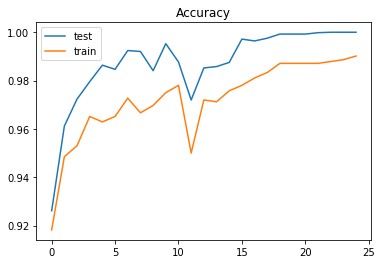

In [23]:
plt.plot(scores_train)
plt.plot(scores_test)
plt.legend(["test","train"])
plt.title("Accuracy")

#### Plotting the graph for loss of the each iteration of the model

Text(0.5, 1.0, 'loss')

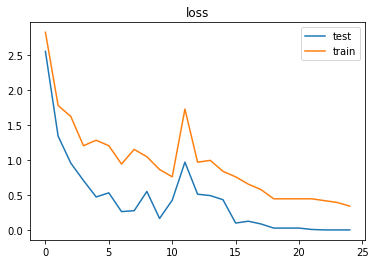

In [24]:
plt.plot(loss_train)
plt.plot(loss_test)
plt.legend(["test","train"])
plt.title("loss")

In [25]:
pred = clas.predict(xtest)

### Model Validation

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [27]:
print("Accuracy score is "+str(accuracy_score(ytest,pred)*100))

Accuracy score is 99.01515151515152


In [28]:
print("precision score is "+str(precision_score(ytest,pred)*100))

precision score is 96.26168224299066


In [29]:
print("F1 score is "+str(f1_score(ytest,pred)*100))

F1 score is 96.94117647058823


In [30]:
print("Recall score is "+str(recall_score(ytest,pred)*100))

Recall score is 97.6303317535545


In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(ytest,pred)

array([[1101,    8],
       [   5,  206]], dtype=int64)